In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import Seaborn_visualizer as SBV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Liquor_Licenses.csv")

In [3]:
df.shape

(2130, 32)

In [4]:
df.dtypes

OBJECTID               int64
LICENSE               object
TRADE_NAME            object
APPLICANT             object
CLASS                 object
ADDRESS               object
ADDRID               float64
X                    float64
Y                    float64
STATUS                object
TYPE                  object
BREW_PUB              object
ENTERTAINMENT         object
SALES_CONSUMPTION     object
SIDEWALK_CAFE         object
SUMMER_GARDEN         object
TASTING               object
WINE_PUB              object
WARD                  object
ZIPCODE                int64
SMD                   object
ANC                   object
COVERCHARGE           object
DANCING               object
OFFPREMISESTORAGE     object
STORAGEFACILITY      float64
DISTILLERY_PUB        object
LONGITUDE            float64
LATITUDE             float64
TOTAL_CAPACITY       float64
GAMES_OF_SKILL        object
SPORTS_WAGGERING      object
dtype: object

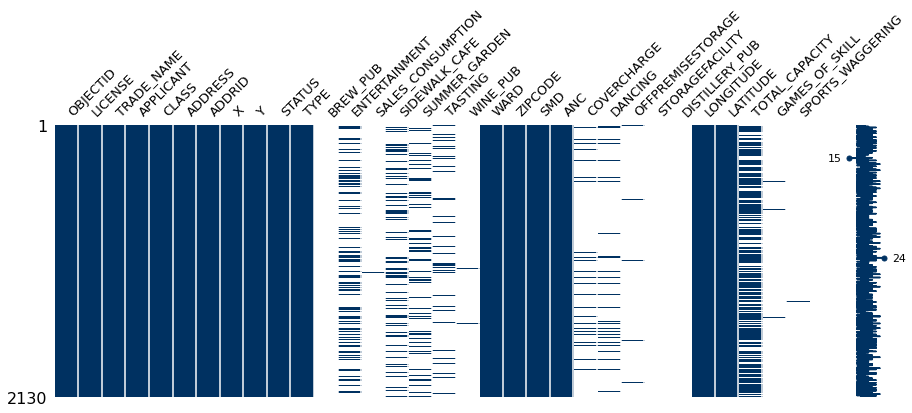

In [5]:
fig = msno.matrix(df,color=(0, 0.196, 0.384),figsize=(15,5), fontsize=13)
fig_copy = fig.get_figure()
fig_copy.savefig('../Figures/Data_cleaning_report/missing_no.png', bbox_inches = 'tight')

In [6]:
# Need to recode retail class B and retail full service grocery
df.TYPE.value_counts()

Restaurant                       898
Tavern                           382
Retail - Liquor Store            220
Retail - Grocery                 125
Hotel                            106
Caterer                           86
Retail-Full Service Grocery       47
Wholesaler                        43
Multipurpose                      42
Nightclub                         41
Retail - Class B                  39
Internet                          24
Club                              19
Manufacturer                      18
25 Percent                        12
Marine Vessel                     11
Beer and Wine                      6
Retail-Liquor Store                5
Arena                              2
Retail-Class B                     2
Railroad                           1
Retail - Full Service Grocery      1
Name: TYPE, dtype: int64

In [7]:
df.isnull().sum()

OBJECTID                0
LICENSE                 0
TRADE_NAME              0
APPLICANT               0
CLASS                   0
ADDRESS                 0
ADDRID                  1
X                       1
Y                       1
STATUS                  0
TYPE                    0
BREW_PUB             2123
ENTERTAINMENT        1440
SALES_CONSUMPTION    2115
SIDEWALK_CAFE        1599
SUMMER_GARDEN        1706
TASTING              1872
WINE_PUB             2122
WARD                    0
ZIPCODE                 0
SMD                     0
ANC                     0
COVERCHARGE          1925
DANCING              1881
OFFPREMISESTORAGE    2107
STORAGEFACILITY      2130
DISTILLERY_PUB       2128
LONGITUDE               0
LATITUDE                0
TOTAL_CAPACITY        684
GAMES_OF_SKILL       2091
SPORTS_WAGGERING     2129
dtype: int64

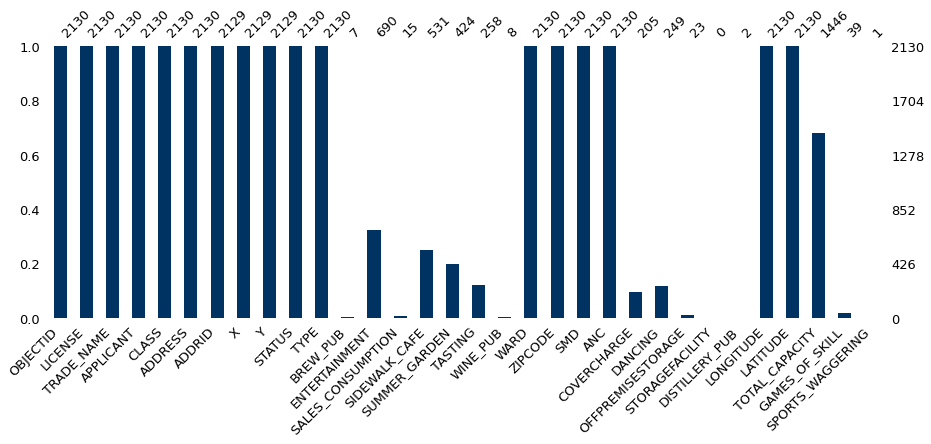

In [8]:
fig2 = msno.bar(df,color=(0, 0.196, 0.384),figsize=(15,5), fontsize=13)
fig2_copy = fig2.get_figure()
fig2_copy.savefig('../Figures/Data_cleaning_report/missing_bar.png', bbox_inches = 'tight')

In [9]:
df.columns

Index(['OBJECTID', 'LICENSE', 'TRADE_NAME', 'APPLICANT', 'CLASS', 'ADDRESS',
       'ADDRID', 'X', 'Y', 'STATUS', 'TYPE', 'BREW_PUB', 'ENTERTAINMENT',
       'SALES_CONSUMPTION', 'SIDEWALK_CAFE', 'SUMMER_GARDEN', 'TASTING',
       'WINE_PUB', 'WARD', 'ZIPCODE', 'SMD', 'ANC', 'COVERCHARGE', 'DANCING',
       'OFFPREMISESTORAGE', 'STORAGEFACILITY', 'DISTILLERY_PUB', 'LONGITUDE',
       'LATITUDE', 'TOTAL_CAPACITY', 'GAMES_OF_SKILL', 'SPORTS_WAGGERING'],
      dtype='object')

In [10]:
recode = ['BREW_PUB', 'ENTERTAINMENT',
       'SALES_CONSUMPTION', 'SIDEWALK_CAFE', 'SUMMER_GARDEN', 'TASTING',
       'WINE_PUB', 'COVERCHARGE', 'DANCING',
       'OFFPREMISESTORAGE', 'STORAGEFACILITY', 'DISTILLERY_PUB','GAMES_OF_SKILL',
          'SPORTS_WAGGERING']

In [11]:
df[recode] = df[recode].replace({np.nan:0,'CHECKED':1 })


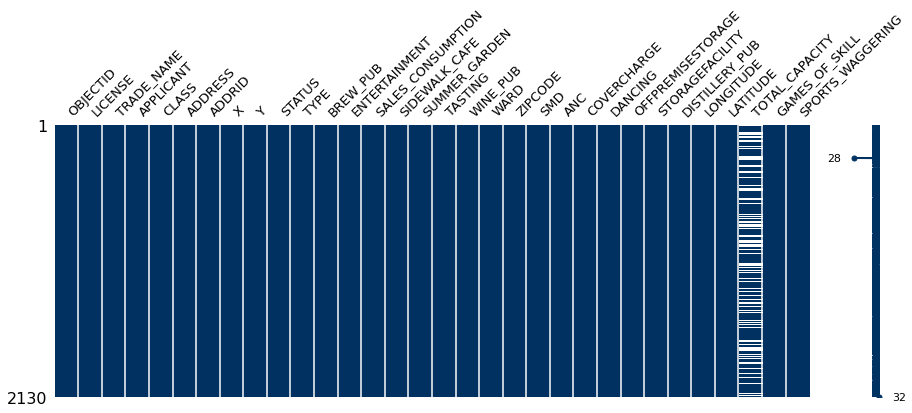

In [12]:
fig3 = msno.matrix(df,color=(0, 0.196, 0.384),figsize=(15,5), fontsize=13)
fig3_copy = fig3.get_figure()
fig3_copy.savefig('../Figures/Data_cleaning_report/missing_no_recode.png', bbox_inches = 'tight')

In [13]:
df.columns

Index(['OBJECTID', 'LICENSE', 'TRADE_NAME', 'APPLICANT', 'CLASS', 'ADDRESS',
       'ADDRID', 'X', 'Y', 'STATUS', 'TYPE', 'BREW_PUB', 'ENTERTAINMENT',
       'SALES_CONSUMPTION', 'SIDEWALK_CAFE', 'SUMMER_GARDEN', 'TASTING',
       'WINE_PUB', 'WARD', 'ZIPCODE', 'SMD', 'ANC', 'COVERCHARGE', 'DANCING',
       'OFFPREMISESTORAGE', 'STORAGEFACILITY', 'DISTILLERY_PUB', 'LONGITUDE',
       'LATITUDE', 'TOTAL_CAPACITY', 'GAMES_OF_SKILL', 'SPORTS_WAGGERING'],
      dtype='object')

In [14]:
cat = ['TYPE','CLASS', 'STATUS','WARD']

In [15]:
df=df.sort_values(by="TYPE")

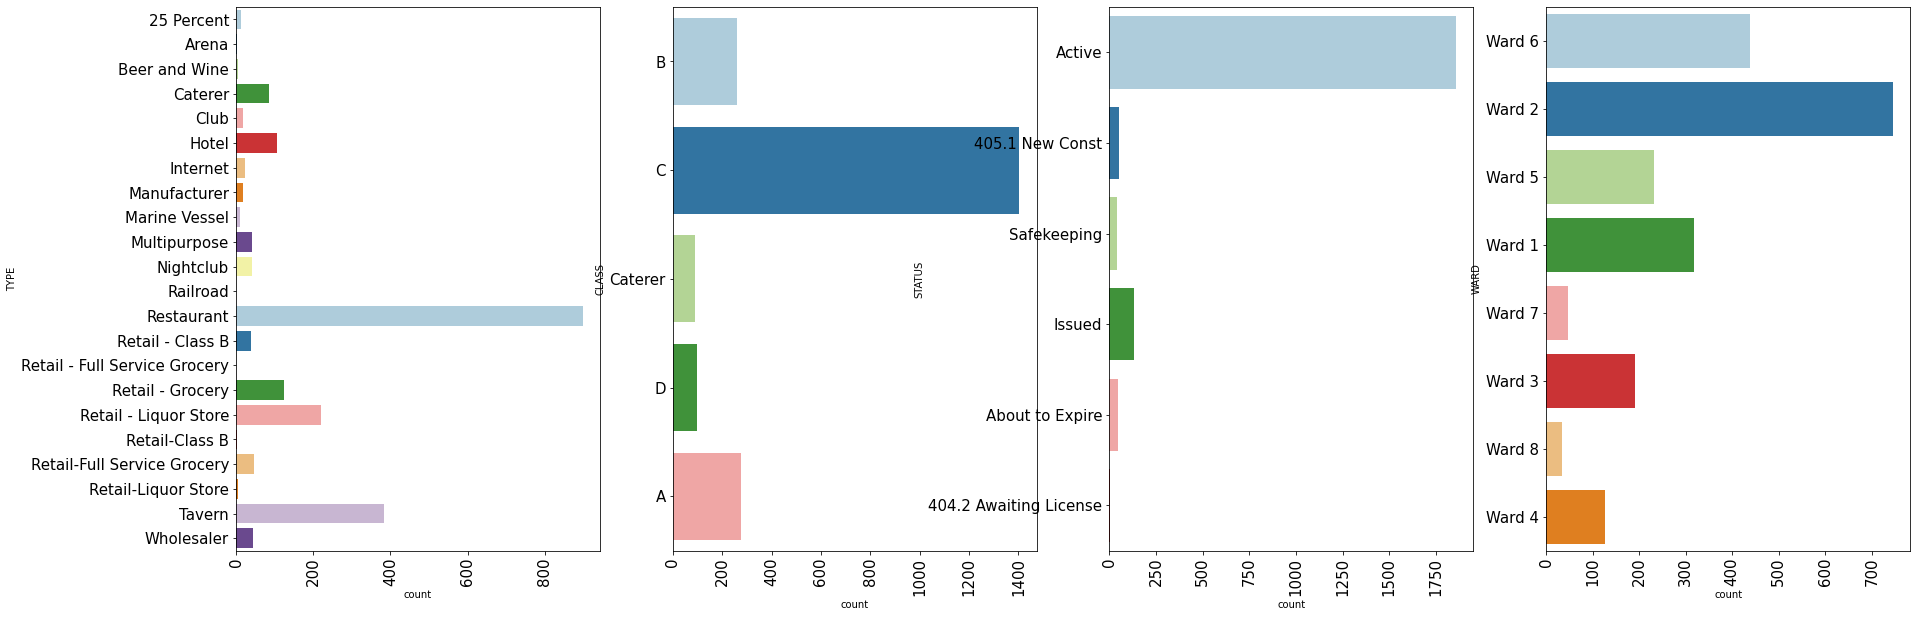

In [16]:
fig, ax = plt.subplots(1,4, figsize=(30, 10))
for variable, subplot in zip(cat, ax.flatten()):
    sns.countplot(y=df[variable], ax=subplot, hue=None, palette='Paired')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    subplot.tick_params(labelsize=15)

plt.savefig('../Figures/Data_cleaning_report/cat.png', dpi=100)

In [17]:
df.TYPE.unique()

array(['25 Percent', 'Arena', 'Beer and Wine', 'Caterer', 'Club', 'Hotel',
       'Internet', 'Manufacturer', 'Marine Vessel', 'Multipurpose',
       'Nightclub', 'Railroad', 'Restaurant', 'Retail - Class B',
       'Retail - Full Service Grocery', 'Retail - Grocery',
       'Retail - Liquor Store', 'Retail-Class B',
       'Retail-Full Service Grocery', 'Retail-Liquor Store', 'Tavern',
       'Wholesaler'], dtype=object)

In [18]:
#Replace TYPE
df.TYPE = df.TYPE.replace({'Retail-Class B': 'Retail - Class B',
                'Retail-Liquor Store':'Retail - Liquor Store',
                 'Retail-Full Service Grocery':'Retail - Full Service Grocery'})

In [19]:
# Replace WARD

df.WARD = df.WARD.replace({'Ward 1':1, 'Ward 2':2, 'Ward 3':3,'Ward 4':4,
                          'Ward 5':5, 'Ward 6':6, 'Ward 7':7,'Ward 8':8})

In [20]:
# df.WARD = df.WARD.astype('category')

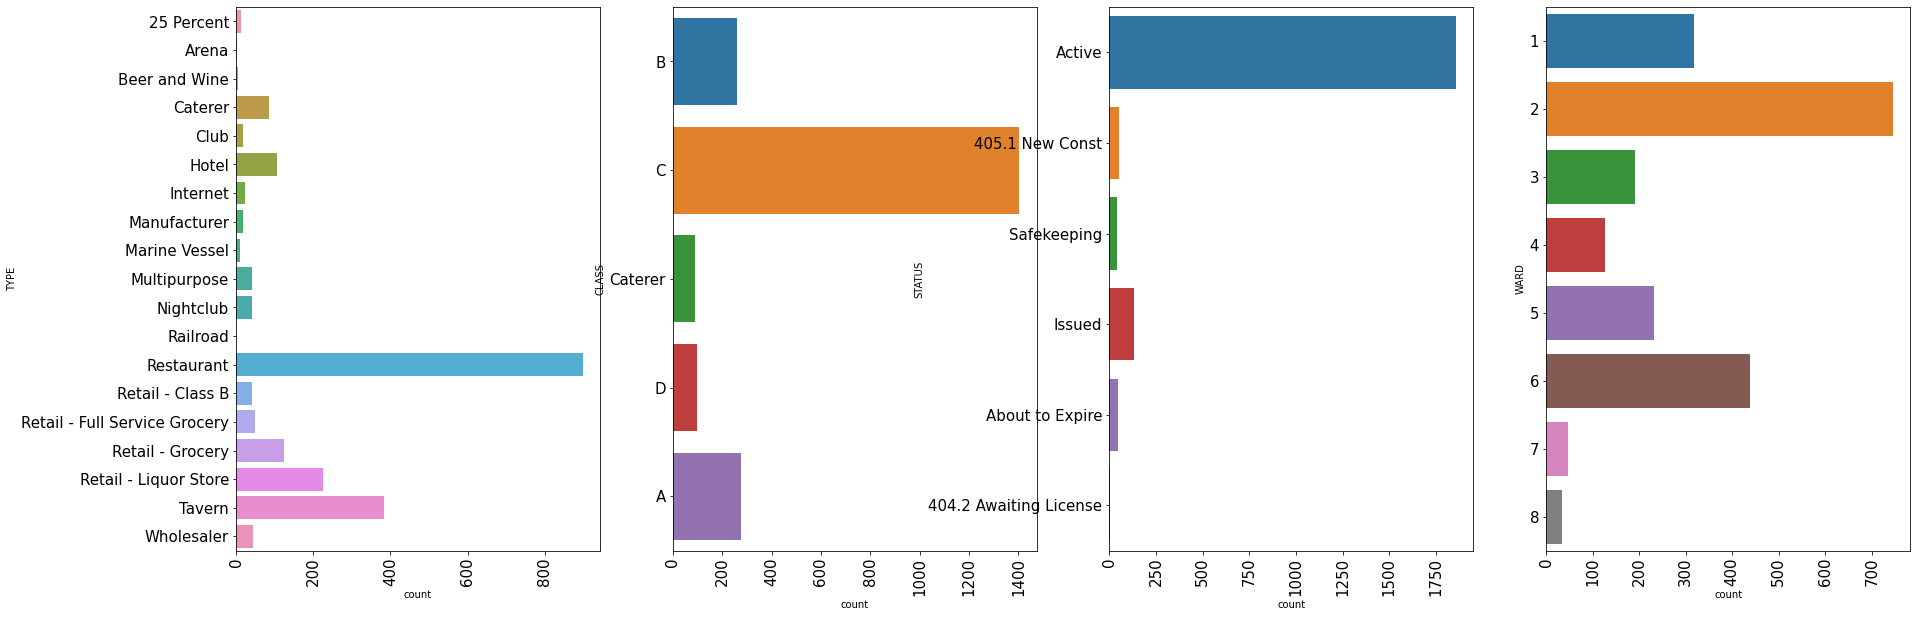

In [21]:
fig, ax = plt.subplots(1,4, figsize=(30, 10))
for variable, subplot in zip(cat, ax.flatten()):
    sns.countplot(y=df[variable], ax=subplot, hue=None)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    subplot.tick_params(labelsize=15)

In [22]:
dup_list = df[df.duplicated(subset='LICENSE')].LICENSE.to_list()

In [23]:
dup = df[df.LICENSE.isin(dup_list)]

In [24]:
dup

OBJECTID      LICENSE                      TRADE_NAME  \
256          3  ABRA-060273      Ritz Carlton Washington DC   
188        253  ABRA-060273      Ritz Carlton Washington DC   
1286      1287  ABRA-102667  Dupont Circle FreshFarm Market   
259          6  ABRA-102667  Dupont Circle FreshFarm Market   
255          2  ABRA-011228                       La Tomate   
254          1  ABRA-001104           The Abbey Rathskeller   
304         51  ABRA-001104           The Abbey Rathskeller   
303         50  ABRA-001104           The Abbey Rathskeller   
33          98  ABRA-011228                       La Tomate   
884        885  ABRA-091449               Rock Creek Market   
258          5  ABRA-091449               Rock Creek Market   
257          4  ABRA-076197                   Press Liquors   
448        449  ABRA-076197                   Press Liquors   

                            APPLICANT    CLASS                      ADDRESS  \
256     MPE Hotel I (Washington), LLC        C          1150 22nd street nw   
188     MPE Hotel I (Washington), LLC        C          1150 22nd street nw   
1286                  Aaron C. Dutton  Caterer              1600 20th ST NW   
259                   Aaron C. Dutton  Caterer              1600 20th ST NW   
255   R Street Restaurant Corporation        C      1701 CONNECTICUT AVE NW   
254                 Gallaudet College        D           700 FLORIDA AVE NE   
304                 Gallaudet College        D           800 FLORIDA AVE NE   
303                 Gallaudet College        D           700 FLORIDA AVE NE   
33    R Street Restaurant Corporation        C      1701 CONNECTICUT AVE NW   
884                       A & M, Inc.        B  646 ROCK CREEK CHURCH RD NW   
258                       A & M, Inc.        B  646 ROCK CREEK CHURCH RD NW   
257             Lim Enterprises, Corp        A               527 14th ST NW   
448             Lim Enterprises, Corp        A               527 14th ST NW   

        ADDRID          X          Y  STATUS  ... COVERCHARGE  DANCING  \
256   278889.0  395743.76  137408.03  Active  ...           0        1   
188   278889.0  395743.76  137408.03  Active  ...           0        1   
1286  242869.0  396079.17  138162.25  Active  ...           0        0   
259   242869.0  396079.17  138162.25  Active  ...           0        0   
255   243323.0  396088.84  138349.19  Issued  ...           0        0   
254   288964.0  400443.69  137543.98  Active  ...           0        0   
304   288964.0  400443.69  137543.98  Active  ...           0        0   
303   288964.0  400443.69  137543.98  Active  ...           0        0   
33    243323.0  396088.84  138349.19  Issued  ...           0        0   
884   285338.0  398164.78  140996.59  Active  ...           0        0   
258   285338.0  398164.78  140996.59  Active  ...           0        0   
257   295084.0  397250.49  136519.99  Active  ...           0        0   
448   295084.0  397250.49  136519.99  Active  ...           0        0   

      OFFPREMISESTORAGE  STORAGEFACILITY  DISTILLERY_PUB  LONGITUDE  \
256                   0              0.0               0 -77.049070   
188                   0              0.0               0 -77.049070   
1286                  0              0.0               0 -77.045207   
259                   0              0.0               0 -77.045207   
255                   0              0.0               0 -77.045097   
254                   0              0.0               0 -76.994885   
304                   0              0.0               0 -76.994885   
303                   0              0.0               0 -76.994885   
33                    0              0.0               0 -77.045097   
884                   0              0.0               0 -77.021168   
258                   0              0.0               0 -77.021168   
257                   0              0.0               0 -77.031695   
448                   0              0.0               0

In [25]:
# Drop duplicates for License and address
df = df.drop_duplicates(subset = ['LICENSE','ADDRESS'], keep = 'last')
# Drop once again to get rid of the row with wrong address for Gallaudet
df = df.drop_duplicates(subset = ['LICENSE'], keep = 'first')

In [26]:
df.TOTAL_CAPACITY

2078   NaN
1487   NaN
1534   NaN
2089   NaN
1619   NaN
        ..
1506   NaN
1829   NaN
705    NaN
1143   NaN
882    NaN
Name: TOTAL_CAPACITY, Length: 2123, dtype: float64

In [27]:
df['LOG_CAPACITY'] = np.log(df.TOTAL_CAPACITY.replace({np.nan:0})+1)

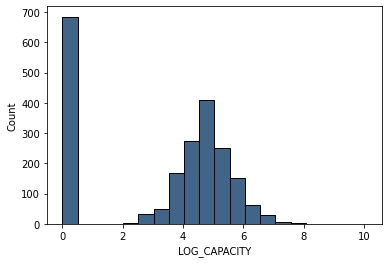

In [81]:
g= sns.histplot(df,x = 'LOG_CAPACITY',bins=20,color=(0, 0.196, 0.384))
fig = g.figure
fig.savefig('../Figures/Data_cleaning_report/log_capacity_missing.png', dpi =300) 

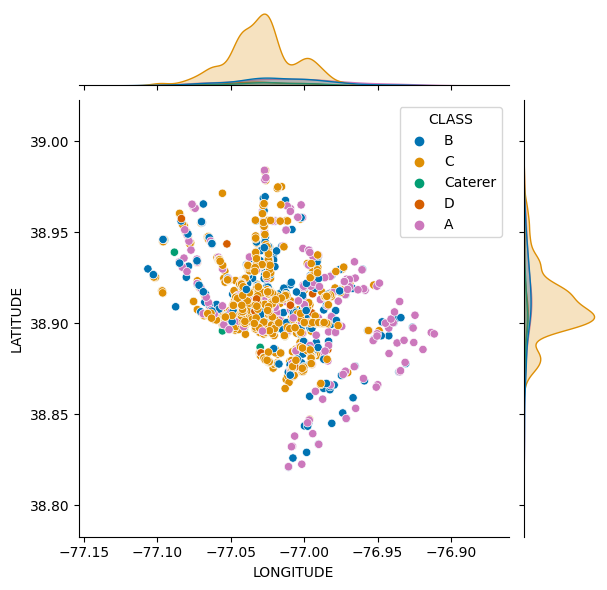

In [168]:
j = sns.jointplot(x=df['LONGITUDE'],y=df['LATITUDE'],hue=df['CLASS'],palette='colorblind')
j.savefig('../Figures/Data_cleaning_report/long_lat.png', dpi =300) 

In [125]:
df.columns

Index(['OBJECTID', 'LICENSE', 'TRADE_NAME', 'APPLICANT', 'CLASS', 'ADDRESS',
       'ADDRID', 'X', 'Y', 'STATUS', 'TYPE', 'BREW_PUB', 'ENTERTAINMENT',
       'SALES_CONSUMPTION', 'SIDEWALK_CAFE', 'SUMMER_GARDEN', 'TASTING',
       'WINE_PUB', 'WARD', 'ZIPCODE', 'SMD', 'ANC', 'COVERCHARGE', 'DANCING',
       'OFFPREMISESTORAGE', 'STORAGEFACILITY', 'DISTILLERY_PUB', 'LONGITUDE',
       'LATITUDE', 'TOTAL_CAPACITY', 'GAMES_OF_SKILL', 'SPORTS_WAGGERING',
       'LOG_CAPACITY'],
      dtype='object')